In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [2]:

data = pd.read_json("Jeopardy.json")

data

,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680
...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,$2000,Turandot,Double Jeopardy!,4999
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,$2000,a titmouse,Double Jeopardy!,4999
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",$2000,Clive Barker,Double Jeopardy!,4999
216928,QUOTATIONS,2006-05-11,"'From Ft. Sill, Okla. he made the plea, Arizon...",$2000,Geronimo,Double Jeopardy!,4999


In [3]:
histogram = data['category'].value_counts()
histogram

BEFORE & AFTER        547
SCIENCE               519
LITERATURE            496
AMERICAN HISTORY      418
POTPOURRI             401
                     ... 
1999 TELEVISION         1
WORDS IN PHYSICS        1
LITERATURE & MUSIC      1
'90s NOTABLES           1
CELEBRITY NAMES         1
Name: category, Length: 27995, dtype: int64

In [4]:
# Categories
scienceCategories = ["MAMMAL","IUM","BUG","INSECT","ASTRO","OMY","NUMBER","BOD","HUM","SCI","WILD","COMP","INVENT","SPECIES","OLOGY","OGIC","PLANT","MICRO","MACRO","MEDIC","PILL","PRODUCT","ANATOMY","ATOM","ELEMENT","ANIMAL","EARTH","PLANET","SPACE","SUN","MOON","OCEAN","GALAXY","VELOCITY","PHYSIC","SCIENCE","BIOLOG","CHEMIST","MATH","ARCHIT","SYSTEM","DEVICE"]
artCategories = ["CRAFT","COLOR","BRUSH","ART","PAINT","DRAW","BRISTLE","SCULPT","IMPRESSION","REALIST","ABSTRACT","MURAL","CREAT"]
literatureCategories = ["QUOT","READ","BESTSELL","LIT","COMIC","WRIT","FICTION","MEMOIR","BIOGRAPH","ODE","SHAKESPEAR","AUTHOR","NOVEL","BOOK","POET","LITERATURE","POEM"]
historyCategories = ["EMP","PAST","B.C.","COURT","U.N.","1","CZAR","YEAR","EPITAPH","REMEMBER","CONSTIT","GOV","MYTH","DECADE","CENTURY","AGE","ERA","WAR","LEADER","HISTOR","MONARCH","POLITIC","PRESIDEN","KING","QUEEN","DICTATOR","ANCIENT","ROYAL"]
popCultureCategories = ["SLOGAN","ZODIAC","NICKNAME","STOCK","SYMBOL","BRAND","HOLIDAY","iP","CULTUR","LOGO","COLL","UNIVERSITY","GOTH","0s","FASHION","POP","NEWS","EVENT","EMO","DISNEY","MALL","TEEN"]
moviesCategories = ["ROLE","SHOW","FILM","CHANNEL","SCREEN","STARR","DIRECT","TV","EMMY","TELEVISION","FILM","MOVIE","ACTOR","ACTRESS","OSCAR","MULTIPLEX","CINEMA"]
sportsCategories = ["NFL","NBA","NHL","MLB","FIFA","SKI","SKATE","MASCOT","SPORT","ATHLETE","SOCCER","FOOTBALL","CRICKET","RUGBY","OLYMPI","BASEBALL"]
celebrityCategories = ["CELEB","FAMOUS","BEN","WARHAL","CRUISE","OPRAH"]
foodCategories = ["CHEESE","NUTRITION","PASTA","MEAT","POTABL","HERB","SPIC","EAT","FOOD","FRUIT","VEG","CHEF","PEACH","COOK","BAKE","OVEN","STIR","ENTREE","DESSERT","DELICIOUS"]
playsCategories = ["OPERA","PLAY","MUSICAL","BROADWAY","TONY","THEATRE","THEATER"]
musicCategories = ["DANC","ROCK","SING","VERSE","SOLO","DUET","BAND","GUITAR","PIANO","JAZZ","TEMPO","CLASSICAL","RADIO","RECORD","VINYL","ALBUM","MUSIC","INSTRUMENT","PIANO","CELLO","VIOLIN","TRUMPET","SONG","LYRIC"]
geographyCategories = ["ISL","GREECE","RIVER","LAKE","NORTH","SOUTH","EAST","WEST","OCEAN","U.S.","YORK","L.A.","ENGLAND","SCOT","FRANC","SPAIN","ITAL","GREEK","MEXICO","US","WORLD","MAP","AMERICA","AFRICA","ASIA","EUROPE","ARCTIC","NATION","FLAG","COUNTRY","GEOGRAPH","CONTINENT","STATE","COUNTY","CITY","CITIES","COUNTIES","TRAVEL"]
religionCategories = ["HEAVEN","RITUAL","CATHOL",":","MOSES","TESTAM","PROPH","TORA","PRAY","QURAN","RELIGION","JESUS","GOD","POPE","CHRISTIANITY","JEWISH","HINDU","ISLAM","MUSLIM","BIBL"]
languageCategories = ["SPEAK","SPEECH","ANAGRAM","OXYMORON","ALPHABET","LINGUIS","PHRAS","BEFORE & AFTER","TALK","SENTENC","ADJECTIVE","NOUN","ADVERB","VERB","PREPOSITION","LIB","POSSESS","METAPHOR","SIMIL","IDIOM","SLANG","CONSONANT","VOWEL","\"","DICT","THESAUR","RHYM","REVERS","SYLLABL","LANGUAG","WORD","LETTER","HOMOPHON"]
peopleCategories = ["PERSON","PEOPLE","EXPLORERS","KILLER","NAME","MR","MRS","MEN"]
dailyLifeCategories = ["GAME","SEX","FURNITURE","MONE","WED","EDUCATION","LEISURE","JOB","WORK","FRIEND","SCHOOL","HEALTH"]
ourCategoryNames = ["SCIENCE","ART","LITERATURE","HISTORY","POP CULTURE","MOVIES","SPORTS","CELEBRITY","FOOD","PLAYS","MUSIC","GEOGRAPHY","RELIGION","LANGUAGE","PEOPLE","DAILY LIFE","MISC"]
ourCategories = [scienceCategories,artCategories,literatureCategories,historyCategories,popCultureCategories,moviesCategories,sportsCategories,celebrityCategories,foodCategories,playsCategories,musicCategories,geographyCategories,religionCategories,languageCategories,peopleCategories,dailyLifeCategories]
categories = data['category'].unique()

In [5]:
missingCategories = np.array([False] * categories.__len__())
i = 0
for category in ourCategories:
    category = np.array(category)
    isin = [any(x in element for x in category) for element in categories]
    missingCategories = missingCategories | isin
    ourCategories[i] = categories[isin]
    i+=1
missingCategories = ~ missingCategories #Flips all trues to false to actually make missing categories work
ourCategories.append(categories[missingCategories])
for i,c in zip(categories[missingCategories],histogram[categories[missingCategories]]):
    print(i,c)

LET'S BOUNCE 5
SEE & SAY 5
IT'S OURS! 5
THE EYES HAVE IT 11
ALASKA 25
ANGELS 16
IN EXILE 5
LET'S HIT IT 5
RVs 3
BEGINNING & END 5
CALL OUT THE VOICE SQUAD 5
AN E FOR AN I 5
AT THE KENNEDY CENTER 5
COMMON BONDS 243
THE REDCOATS ARE COMING! 5
THRILLER 5
SOMETHING'S FISHY 15
VERMONTERS 5
MIXED DRINKS 15
STAMPS 20
SPOTT THA MISPELED WURD 5
FACIAL EXPRESSIONS 15
RANKS & TITLES 62
ON THE COVER OF SGT. PEPPER 5
MY PLACE? 5
IT'S A DATE! 10
VIETNAM 11
TOUR OF JUDY 5
CANDY 12
BIG, REALLY BIG! 5
CAPITOL THINKERS 5
MEET THE PARENTS 5
YOU SHOULD BE IN A BALLET! 5
POTPOURRI 401
WHY? 5
THE BUTLER DID IT 10
ALL ABOARD THE SOUL TRAIN 5
WEEDS 8
INITIAL T.V. 5
SAINTS BE PRAISED 15
'65 5
FORE! 10
THREE 10
TWO 5
JUAN 5
KOREA 5
POLAR EXPLORATION 5
THAT'S NO LADY... 5
DOUBLE A 5
CENTRAL PARK 8
THIS CATEGORY STINKS! 5
WE ARE THE CHAMPIONS 30
PROBLEMS, PROBLEMS 5
MANIAS 5
JEWELRY 28
PEANUTS 10
WINE 49
TEACHER'S PET 9
HOW DO YOU... 25
TELL 'EM WHAT THEY'VE WON, JOHNNY 10
PIZZA TOPPINGS 5
CLASSIC AD LINES 10
HOR

In [6]:
ourHistogram = []
for categoryList in ourCategories:
    s = 0
    for c in categoryList:
        s += histogram[c]
    ourHistogram.append(s)
ourHistogram = np.array(ourHistogram).reshape(1,len(ourHistogram))
ourHistogram = pd.DataFrame(ourHistogram,columns=ourCategoryNames)
ourHistogram

,SCIENCE,ART,LITERATURE,HISTORY,POP CULTURE,MOVIES,SPORTS,CELEBRITY,FOOD,PLAYS,MUSIC,GEOGRAPHY,RELIGION,LANGUAGE,PEOPLE,DAILY LIFE,MISC
0,15262,6076,17377,29867,10416,12719,4259,2557,6466,4846,9270,36849,3581,33487,12321,3400,65657


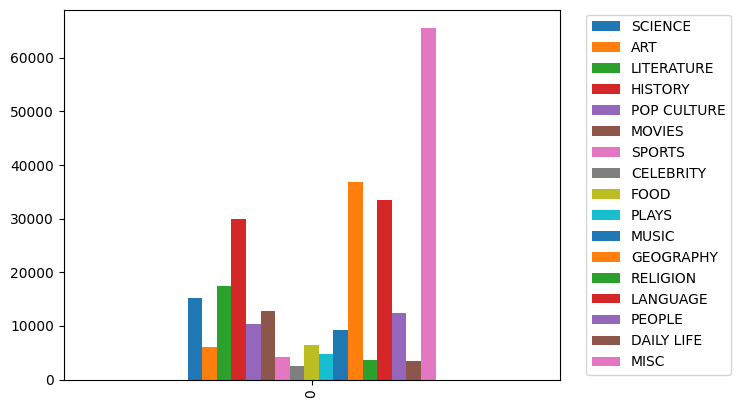

In [7]:
#data.category.value_counts().plot(kind='bar', stacked=True)
ourHistogram.plot(kind='bar').legend(loc='center',bbox_to_anchor=(1.2,0.5))

In [8]:
data = pd.read_json("Jeopardy.json")
#common = data[np.array(histogram > 100)]
#data.columns[(histogram > 100).values]
#data.category.unique().size
common = histogram[histogram.values > 100]
#text_file = open("histogramInfo.txt", "w")
#text_file.write(str(common.items))
#print(str(common))
for idk in common.items():
    print(idk)

('BEFORE & AFTER', 547)
('SCIENCE', 519)
('LITERATURE', 496)
('AMERICAN HISTORY', 418)
('POTPOURRI', 401)
('WORLD HISTORY', 377)
('WORD ORIGINS', 371)
('COLLEGES & UNIVERSITIES', 351)
('HISTORY', 349)
('SPORTS', 342)
('U.S. CITIES', 339)
('WORLD GEOGRAPHY', 338)
('BODIES OF WATER', 327)
('ANIMALS', 324)
('STATE CAPITALS', 314)
('BUSINESS & INDUSTRY', 311)
('ISLANDS', 301)
('WORLD CAPITALS', 300)
('U.S. GEOGRAPHY', 299)
('RELIGION', 297)
('OPERA', 294)
('SHAKESPEARE', 294)
('LANGUAGES', 284)
('BALLET', 282)
('TELEVISION', 281)
('FICTIONAL CHARACTERS', 280)
('PEOPLE', 279)
('RHYME TIME', 279)
('TRANSPORTATION', 279)
('ART & ARTISTS', 270)
('STUPID ANSWERS', 270)
('THE BIBLE', 267)
('ART', 258)
('BOOKS & AUTHORS', 255)
('U.S. HISTORY', 250)
('FOOD', 246)
('MUSEUMS', 245)
('AMERICANA', 244)
('SCIENCE & NATURE', 244)
('COMMON BONDS', 243)
('GEOGRAPHY', 242)
('HOLIDAYS & OBSERVANCES', 242)
('3-LETTER WORDS', 240)
('ANNUAL EVENTS', 236)
('AMERICAN LITERATURE', 234)
('CLASSICAL MUSIC', 233)
('

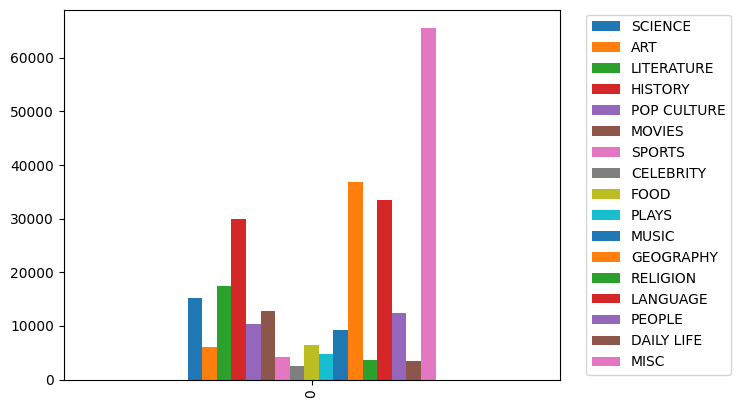

In [11]:
#data.category.value_counts().plot(kind='bar', stacked=True)
ourHistogram.plot(kind='bar').legend(loc='center',bbox_to_anchor=(1.2,0.5))

In [12]:
data = pd.read_json("Jeopardy.json")
#common = data[np.array(histogram > 100)]
#data.columns[(histogram > 100).values]
#data.category.unique().size
common = histogram[histogram.values > 100]
#text_file = open("histogramInfo.txt", "w")
#text_file.write(str(common.items))
#print(str(common))
for idk in common.items():
    print(idk)

('BEFORE & AFTER', 547)
('SCIENCE', 519)
('LITERATURE', 496)
('AMERICAN HISTORY', 418)
('POTPOURRI', 401)
('WORLD HISTORY', 377)
('WORD ORIGINS', 371)
('COLLEGES & UNIVERSITIES', 351)
('HISTORY', 349)
('SPORTS', 342)
('U.S. CITIES', 339)
('WORLD GEOGRAPHY', 338)
('BODIES OF WATER', 327)
('ANIMALS', 324)
('STATE CAPITALS', 314)
('BUSINESS & INDUSTRY', 311)
('ISLANDS', 301)
('WORLD CAPITALS', 300)
('U.S. GEOGRAPHY', 299)
('RELIGION', 297)
('OPERA', 294)
('SHAKESPEARE', 294)
('LANGUAGES', 284)
('BALLET', 282)
('TELEVISION', 281)
('FICTIONAL CHARACTERS', 280)
('PEOPLE', 279)
('RHYME TIME', 279)
('TRANSPORTATION', 279)
('ART & ARTISTS', 270)
('STUPID ANSWERS', 270)
('THE BIBLE', 267)
('ART', 258)
('BOOKS & AUTHORS', 255)
('U.S. HISTORY', 250)
('FOOD', 246)
('MUSEUMS', 245)
('AMERICANA', 244)
('SCIENCE & NATURE', 244)
('COMMON BONDS', 243)
('GEOGRAPHY', 242)
('HOLIDAYS & OBSERVANCES', 242)
('3-LETTER WORDS', 240)
('ANNUAL EVENTS', 236)
('AMERICAN LITERATURE', 234)
('CLASSICAL MUSIC', 233)
('

In [81]:
incomplete = histogram[histogram.values % 5 != 0]
for idk in incomplete.items():
    print(idk)

('BEFORE & AFTER', 547)
('SCIENCE', 519)
('LITERATURE', 496)
('AMERICAN HISTORY', 418)
('POTPOURRI', 401)
('WORLD HISTORY', 377)
('WORD ORIGINS', 371)
('COLLEGES & UNIVERSITIES', 351)
('HISTORY', 349)
('SPORTS', 342)
('U.S. CITIES', 339)
('WORLD GEOGRAPHY', 338)
('BODIES OF WATER', 327)
('ANIMALS', 324)
('STATE CAPITALS', 314)
('BUSINESS & INDUSTRY', 311)
('ISLANDS', 301)
('U.S. GEOGRAPHY', 299)
('RELIGION', 297)
('OPERA', 294)
('SHAKESPEARE', 294)
('LANGUAGES', 284)
('BALLET', 282)
('TELEVISION', 281)
('PEOPLE', 279)
('RHYME TIME', 279)
('TRANSPORTATION', 279)
('THE BIBLE', 267)
('ART', 258)
('FOOD', 246)
('AMERICANA', 244)
('SCIENCE & NATURE', 244)
('COMMON BONDS', 243)
('GEOGRAPHY', 242)
('HOLIDAYS & OBSERVANCES', 242)
('ANNUAL EVENTS', 236)
('AMERICAN LITERATURE', 234)
('CLASSICAL MUSIC', 233)
('POP MUSIC', 232)
('AUTHORS', 232)
('QUOTATIONS', 226)
('HODGEPODGE', 222)
('MYTHOLOGY', 221)
('THE MOVIES', 218)
('WORLD CITIES', 214)
('MUSICAL INSTRUMENTS', 212)
('AROUND THE WORLD', 207)

In [76]:
data = pd.read_json("Jeopardy.json")
data.value = data.value.map(lambda x: x.replace("$",",").replace(",","") if x else "0")
dd = data[data.value.astype(int) > 2000]
dd = pd.concat([dd,data[data.value.astype(int) % 10 != 0]])
dd = dd.sort_values(by=['value'])
dd
#val = data.value[0]
#val


,category,air_date,question,value,answer,round,show_number
156881,STATE CAPITAL NICKNAMES,2009-12-10,"'""The Bluegrass Capital""'",10000,Frankfort,Double Jeopardy!,5809
187038,COMMON BONDS,2010-12-22,"'The Beastie Boys,<br />a Chrysler model, <br ...",10000,New Yorkers,Double Jeopardy!,6048
124765,FOLKLORE,2009-01-28,"'In Native American culture, these mythical bi...",10000,thunderbirds,Double Jeopardy!,5618
13606,GRANADA,2004-11-09,'Granada is in this larger region from which t...,10000,Andalucia,Double Jeopardy!,4642
180151,IN THE BOOKSTORE,2009-09-17,"'He wrote books on fishing & hunting, & you mi...",10000,Hemingway,Double Jeopardy!,5749
...,...,...,...,...,...,...,...
198303,"SHAKESPEARE, FOR STARTERS",2011-03-18,'Philo's first speech in this play includes th...,9000,Anthony & Cleopatra,Double Jeopardy!,6110
113015,KINGS,2009-03-20,"'A busy guy, he was King of Italy (1900 to 194...",9000,Victor Emmanuel (III),Double Jeopardy!,5655
176099,GIVE ME SOME DIRECTION,2009-04-16,"'Birds use these, also called thermal columns,...",9200,updrafts,Double Jeopardy!,5674
46181,WE'LL ALWAYS HAVE PARIS,2001-02-14,'Parts of the Paris Las Vegas facade resembles...,9500,Grand Opera House,Double Jeopardy!,3793


<AxesSubplot: >

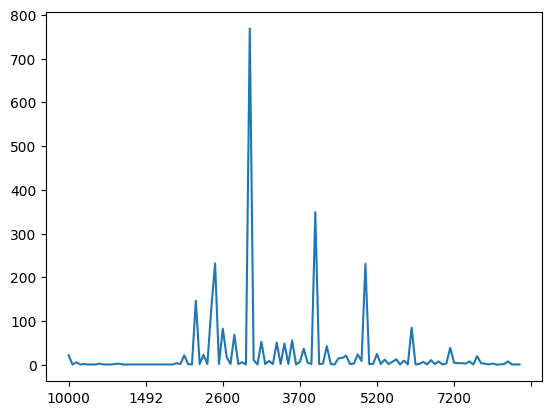

In [71]:
dd['value'].value_counts().sort_index().plot()